In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import date

In [2]:
df = pd.read_csv('./popculture-imdb-5000-movie-dataset/data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## What's the probability that a movie was longer than an hour and a half?

In [3]:
df_hour_half = df[df.duration > 90.0].count() / df.count()
print('{:.2f}%'.format(df_hour_half['duration'] * 100))

81.05%


## Two hours?

In [4]:
df_two = df[df.duration > 120.0].count() / df.count()
print('{:.2f}%'.format(df_two['duration'] * 100))

21.22%


## What's the probability that a movie was directed by Steven Spielberg?

In [5]:
df_spiel = df[df.director_name == "Steven Spielberg"].count() / df.count()
print('{:.2f}%'.format(df_spiel['director_name'] * 100))

0.53%


## What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [6]:
df_clint = df[df.director_name == "Clint Eastwood"]
df_clint_under = df_clint[df_clint.gross < df_clint.budget].count() / df_clint.count()
print('{:.2f}%'.format(df_clint_under['gross'] * 100))

36.84%


## What's the probability that a movie generally grossed more than its budget?


In [7]:
df_overly_gross = df[df.gross > df.budget].count() / df['gross'].count()
print('{:.2f}%'.format(df_overly_gross['gross'] * 100))

49.29%


## What's the probability that a movie grossed over the average gross of this data set?

In [8]:
avg_gross = df['gross'].mean()
prob_gross= df[df.gross > avg_gross].count() / df['gross'].count()
print('{:.2f}%'.format(prob_gross['gross'] * 100))

31.88%


## For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross > budget).

## In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [9]:
df_imdb_high = df[df.imdb_score >= 6.0]
df_imdb_low = df[df.imdb_score < 6.0]
false_pos = df_imdb_high[df_imdb_high.gross < df_imdb_high.budget].head(10)
pd.DataFrame(false_pos['movie_title'])

,movie_title
2,Spectre
5,John Carter
7,Tangled
11,Superman Returns
12,Quantum of Solace
14,The Lone Ranger
16,The Chronicles of Narnia: Prince Caspian
18,Pirates of the Caribbean: On Stranger Tides
19,Men in Black 3
22,Robin Hood


In [10]:
false_neg = pd.DataFrame(df_imdb_low[df_imdb_low.gross > df_imdb_low.budget].head(10))
pd.DataFrame(false_neg['movie_title'])

,movie_title
37,Transformers: Age of Extinction
122,Night at the Museum: Battle of the Smithsonian
174,The Twilight Saga: Breaking Dawn - Part 2
187,The Twilight Saga: Breaking Dawn - Part 2
213,Clash of the Titans
222,Fantastic 4: Rise of the Silver Surfer
224,Ghost Rider
245,Teenage Mutant Ninja Turtles
262,The Smurfs
276,Stuart Little


## If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [11]:
tom_hanks = df[(df.actor_1_name == "Tom Hanks") | (df.actor_2_name == "Tom Hanks") | (df.actor_3_name == "Tom Hanks")]
tom_hanks_prob = tom_hanks[tom_hanks.gross > tom_hanks.budget].count() / tom_hanks.count()
harrison_ford = df[(df.actor_1_name == "Harrison Ford") | (df.actor_2_name == "Harrison Ford") | (df.actor_3_name == "Harrison Ford")]
harrison_ford_prob = harrison_ford[harrison_ford.gross > harrison_ford.budget].count() / harrison_ford.count()
print('{:.2f}% chance of Tom Hanks making money.'.format(tom_hanks_prob['gross'] * 100))
print('{:.2f}% chance of Harrison Ford making money.'.format(tom_hanks_prob['gross'] * 100))
print('Keep Tom Hanks!')

78.57% chance of Tom Hanks making money.
78.57% chance of Harrison Ford making money.
Keep Tom Hanks!


## Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

In [12]:
tom_rate = tom_hanks['imdb_score'].mean()
print('Tom has an average rated movie of {:.1f}'.format(tom_rate))
harrison_rate = harrison_ford['imdb_score'].mean()
print('Harrison has an average rated movie of {:.1f}'.format(harrison_rate))
print('Still keep Tom Hanks!')

Tom has an average rated movie of 7.4
Harrison has an average rated movie of 7.1
Still keep Tom Hanks!


## What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [13]:
df_dur = df[(df.duration > 70) & (df.duration < 90)].count() / df.count()
print('{:.2f}%'.format(df_dur['duration'] * 100))

13.23%


## How does the distribution of movie budgets compare to the movie gross values?

In [14]:
#rerun line to see plot
df['ratio'] = df['gross'] / df['budget']
dist = df[['budget', 'gross']].plot(x='budget', y='gross', kind='scatter').set_xscale('log')
dist

## Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

In [15]:
# Megan did this, Austin did the all_genres line
genre_gross = df[['genres', 'ratio']]
#all me right here
all_genres = list(set('|'.join(df.genres.values).split('|')))
#back to megan
print(all_genres)
groups = genre_gross.genres.map(lambda cell: tuple(genre in cell for genre in all_genres))
print('\npresence of specific genres in a movie\n')
groups.head()

['Animation', 'History', 'Mystery', 'Documentary', 'Crime', 'Short', 'Thriller', 'Comedy', 'War', 'News', 'Game-Show', 'Adventure', 'Family', 'Western', 'Horror', 'Biography', 'Romance', 'Musical', 'Action', 'Reality-TV', 'Film-Noir', 'Drama', 'Sport', 'Music', 'Sci-Fi', 'Fantasy']

presence of specific genres in a movie



0    (False, False, False, False, False, False, Fal...
1    (False, False, False, False, False, False, Fal...
2    (False, False, False, False, False, False, Tru...
3    (False, False, False, False, False, False, Tru...
4    (False, False, False, True, False, False, Fals...
Name: genres, dtype: object

In [16]:
genre_gross.index = pd.MultiIndex.from_tuples(groups.values, names=all_genres)
print('convert tuples to indexes')
genre_gross.head() # note: all the indexes are actually filled!

convert tuples to indexes


genres  \
Animation History Mystery Documentary Crime Short Thriller Comedy War   News  Game-Show Adventure Family Western Horror Biography Romance Musical Action Reality-TV Film-Noir Drama Sport Music Sci-Fi Fantasy                                    
False     False   False   False       False False False    False  False False False     True      False  False   False  False     False   False   True   False      False     False False False True   True     Action|Adventure|Fantasy|Sci-Fi   
                                                                                                                                                                                                False  True            Action|Adventure|Fantasy   
                                                  True     False  False False False     True      False  False   False  False     False   False   True   False      False     False False False False  False          Action|Adventure|Thriller   
                                                                                        False     False  False   False  False     False   False   True   False      False     False False False False  False                    Action|Thriller   
                          True        False False False    False  False False False     False     False  False   False  False     False   False   False  False      False     False False False False  False                        Documentary   

                                                                                                                                                                                                                   ratio  
Animation History Mystery Documentary Crime Short Thriller Comedy War   News  Game-Show Adventure Family Western Horror Biography Romance Musical Action Reality-TV Film-Noir Drama Sport Music Sci-Fi Fantasy            
False     False   False   False       False False False    False  False False False     True      False  False   False  False     False   False   True   False      False     False False False True   True     3.208885  
                                                                                                                                                                                                False  True     1.031347  
                                                  True     False  False False False     True      False  False   False  False     False   False   True   False      False     False False False False  False    0.816629  
                                                                                        False     False  False   False  False     False   False   True   False      False     False False False False  False    1.792523  
                          True        False False False    False  False False False     False     False  False   False  False     False   False   False  False      False     False False False False  False         NaN

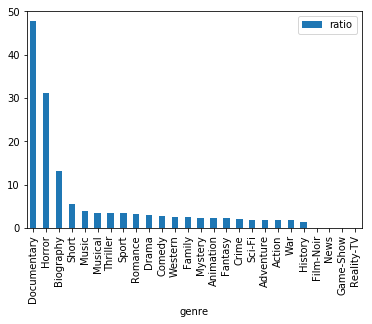

In [17]:
#Create a new data from the new genre data
genre_data = {'ratio': [], 'genre': []}
for g in all_genres:
    genre_data['ratio'].append(genre_gross.xs(True, level=g).ratio.mean())
    genre_data['genre'].append(g)
answer = pd.DataFrame(genre_data).sort_values('ratio', ascending=False)
answer.plot(x='genre', kind='bar')
# Thanks Megan

## Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

In [18]:
nick = df[(df.actor_1_name == "Nicolas Cage") | (df.actor_2_name == "Nicolas Cage") | (df.actor_3_name == "Nicolas Cage")]
not_nick = df[(df.actor_1_name != "Nicolas Cage") & (df.actor_2_name != "Nicolas Cage") & (df.actor_3_name != "Nicolas Cage")]
nick_compare = nick['imdb_score'].mean() / not_nick['imdb_score'].mean()
print('Nicolas Cage scores on average {:.2f}% less than his peers. Honestly not that bad.'.format(1 - nick_compare))

Nicolas Cage scores on average 0.05% less than his peers. Honestly not that bad.


## Have any years grossed a statistically-significant higher amount than the other years?

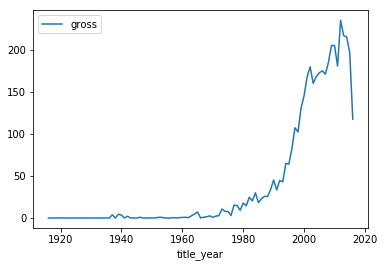

In [19]:
year = pd.DataFrame(df['gross'].groupby(df.title_year).sum() / df['gross'].mean())
year.plot()

## Nicolas Cage review scores

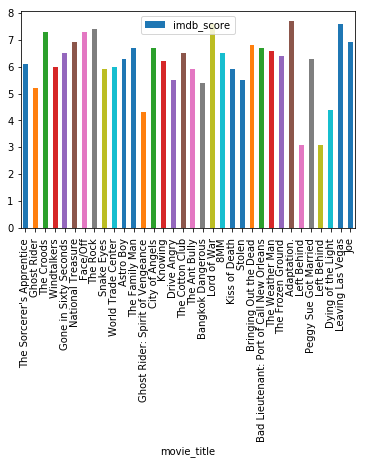

In [20]:
nick.plot(x='movie_title', y='imdb_score', kind="bar")